In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

In [2]:
df = pd.read_csv('dvd rental final csv.csv')

In [3]:
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [4]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# Convert the 'date' column to datetime
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Extract year, month, day, hour, minute, and second
df['rental_year'] = df['rental_date'].dt.year
df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day
df['rental_hour'] = df['rental_date'].dt.hour
df['rental_minute'] = df['rental_date'].dt.minute

df.drop('rental_date', axis=1, inplace=True)

df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,...,rental_id,customer_id,return_date,amount,active,rental_year,rental_month,rental_day,rental_hour,rental_minute
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,...,1520,341,2005-06-24 23:46:20,7.99,1,2005,6,15,23,57
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,...,1778,341,2005-06-22 16:08:48,1.99,1,2005,6,16,18,54
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,...,1849,341,2005-06-23 18:37:19,7.99,1,2005,6,17,0,13
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,...,2829,341,2005-06-24 18:10:30,2.99,1,2005,6,19,21,11
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,...,3130,341,2005-06-29 18:05:22,7.99,1,2005,6,20,19,3


In [7]:
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract year, month, day, hour, minute, and second
df['return_year'] = df['return_date'].dt.year
df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day
df['return_hour'] = df['return_date'].dt.hour
df['return_minute'] = df['return_date'].dt.minute

df.drop('return_date', axis=1, inplace=True)

In [8]:
df.isnull().sum()

inventory_id        0
film_id             0
title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category            0
language            0
store_id            0
rental_id           0
customer_id         0
amount              0
active              0
rental_year         0
rental_month        0
rental_day          0
rental_hour         0
rental_minute       0
return_year         0
return_month        0
return_day          0
return_hour         0
return_minute       0
dtype: int64

In [9]:
df.drop('language',axis=1, inplace=True)
df.drop('rental_year',axis=1, inplace=True)
df.drop('return_year',axis=1, inplace=True)
df.drop('rental_hour',axis=1, inplace=True)
df.drop('rental_minute',axis=1, inplace=True)
df.drop('return_hour',axis=1, inplace=True)
df.drop('return_minute',axis=1, inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)

In [10]:
categorical_column_to_iterate = ['rating', 'category']
continuous_column_to_iterate = ['amount', 'rental_rate', 'replacement_cost']

In [11]:
df['rating'].value_counts()

rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [12]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4})

In [13]:
df['rating'].value_counts()

rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [14]:
df['category'].value_counts()

category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [15]:
df['category'].unique()

array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [16]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15})

In [17]:
df['category'].value_counts()

category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

In [18]:
#encoding
encoders_cont = {}
for col in continuous_column_to_iterate:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders_cont[col] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders_cont, f)

In [19]:
encoders_cont

{'amount': LabelEncoder(),
 'rental_rate': LabelEncoder(),
 'replacement_cost': LabelEncoder()}

In [20]:
df.head()

,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_month,rental_day,return_month,return_day
0,6,2,153,10,3,0,7,1,6,15,6,24
1,5,0,130,6,2,1,1,1,6,16,6,22
2,3,2,138,0,2,2,7,1,6,17,6,23
3,5,1,100,2,4,3,2,1,6,19,6,24
4,6,2,165,7,3,4,7,1,6,20,6,29


In [21]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [24]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [25]:
x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [26]:
x_test_scaler_df

,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
0,-1.381741,-1.183561,0.051635,1.594683,0.067549,-0.578870,0.161573,1.093472,-0.046230,0.776254,0.462239
1,-0.669759,1.243053,0.625395,-0.863545,-0.646876,-1.227690,0.161573,-0.365346,-0.619682,-0.590282,0.462239
2,-1.381741,0.029746,-0.746640,0.283628,0.781975,-0.578870,0.161573,1.093472,0.641911,0.776254,1.565039
3,0.754204,0.029746,0.775071,0.939156,-1.361301,-0.146323,0.161573,-0.365346,1.330052,-0.590282,1.454759
4,-1.381741,0.029746,0.176365,1.266919,-1.361301,-0.146323,0.161573,1.093472,-1.881274,0.776254,-1.081680
...,...,...,...,...,...,...,...,...,...,...,...
3599,0.042222,1.243053,1.423670,0.611392,-0.646876,-1.011416,0.161573,-1.824163,0.183150,-1.956817,1.123919
3600,-1.381741,0.029746,1.598293,0.119746,-0.646876,-1.227690,0.161573,1.093472,0.297840,0.776254,1.234199
3601,0.042222,1.243053,-0.572018,-0.535781,-0.646876,-0.146323,0.161573,-0.365346,-1.307823,-0.590282,-1.081680
3602,0.042222,1.243053,0.500664,1.430801,-1.361301,1.583863,0.161573,1.093472,0.068460,0.776254,0.793079


In [27]:
x_train_scaler_df.shape[1]

11

In [28]:
y_train.shape

(10809,)

# poor DEEP LEARNING algo

In [29]:
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(1)) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/Users/saro/Desktop/dvdrentaldeeplearning/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/saro/Desktop/dvdrentaldeeplearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,257 (1.00 MB)

 Trainable params: 262,257 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
x_train_scaler_df.shape, y_train.shape

((10809, 11), (10809,))

In [32]:
x_train_scaler_df.columns

Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [33]:
result = model.fit(x_train_scaler_df,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


/Users/saro/Desktop/dvdrentaldeeplearning/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1868 - f1_score: 1.5259 - loss: 3.8384e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1855 - val_f1_score: 1.5269 - val_loss: 3.8470e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
  1/271 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1562 - f1_score: 1.5524 - loss: 4.1351e-07 - precision: 0.0000e+00 - recall: 0.0000e+00

/Users/saro/Desktop/dvdrentaldeeplearning/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1822 - f1_score: 1.5280 - loss: 3.8603e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1855 - val_f1_score: 1.5269 - val_loss: 3.8470e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1848 - f1_score: 1.5243 - loss: 3.8203e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1855 - val_f1_score: 1.5269 - val_loss: 3.8470e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1817 - f1_score: 1.5285 - loss: 3.8651e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1855 - val_f1_score: 1.5269 - val_loss: 3.8470e-07 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1817 - f1_score: 1.5284 - loss: 3.8643e-07 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1855 - v

In [34]:
result.history

{'accuracy': [0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,
  0.18503527343273163,

In [35]:
result_df = pd.DataFrame(result.history)
result_df

,accuracy,f1_score,loss,precision,recall,val_accuracy,val_f1_score,val_loss,val_precision,val_recall
0,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
1,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
2,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
3,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
4,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
96,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
97,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0
98,0.185035,1.525815,3.835873e-07,0.0,0.0,0.185476,1.526863,3.847009e-07,0.0,0.0


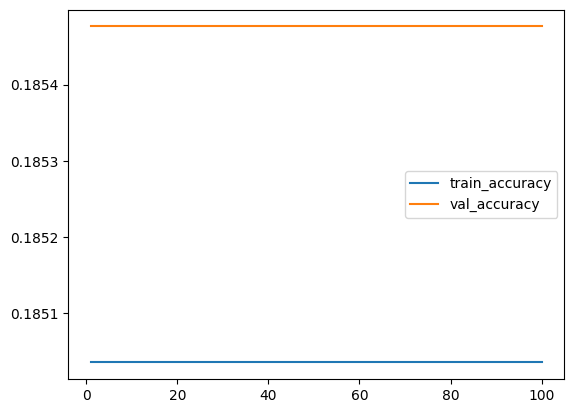

In [36]:
plt.plot(range(1,101),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,101),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [37]:
model.predict(x_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


array([[2.3521204],
       [2.8692055],
       [1.8536557],
       ...,
       [1.8880847],
       [2.7933073],
       [3.7094   ]], dtype=float32)

In [38]:
model.evaluate (x = x_test, y = y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.0386 - f1_score: 1.5283 - loss: 3.8642e-07 - precision: 0.8112 - recall: 1.0000


/Users/saro/Desktop/dvdrentaldeeplearning/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


[3.877940741858765e-07,
 1.5297495126724243,
 0.03856825828552246,
 0.8152053356170654,
 1.0]

# Attempting to do better

In [49]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])




In [50]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,985 (1023.38 KB)

 Trainable params: 261,985 (1023.38 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
result = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0731 - mean_absolute_error: 1.9385 - mean_squared_error: 6.0731 - val_loss: 1.6415 - val_mean_absolute_error: 1.0526 - val_mean_squared_error: 1.6415
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1524 - mean_absolute_error: 0.8036 - mean_squared_error: 1.1524 - val_loss: 0.7923 - val_mean_absolute_error: 0.6813 - val_mean_squared_error: 0.7923
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6313 - mean_absolute_error: 0.5511 - mean_squared_error: 0.6313 - val_loss: 0.3286 - val_mean_absolute_error: 0.3372 - val_mean_squared_error: 0.3286
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3587 - mean_absolute_error: 0.3644 - mean_squared_error: 0.3587 - val_loss: 1.0443 - val_mean_absolute_error: 0.7848 - val_mean_squared_error: 1.0443
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3976 - mean_absolute_error: 0.4118 - mean_squared_error: 0.3976 - val_loss: 0.6240 - 

In [56]:
result.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

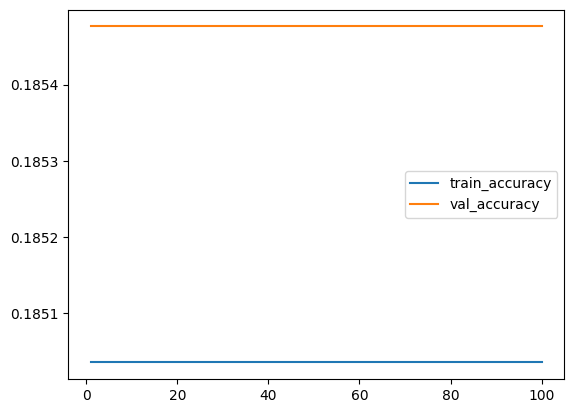

In [44]:
plt.plot(range(1,101),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,101),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [57]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0072 - mean_absolute_error: 0.0426 - mean_squared_error: 0.0072
Test Loss (MSE): [0.007548044435679913, 0.007548044435679913, 0.044209953397512436]


In [58]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
R² score: 0.998683750629425


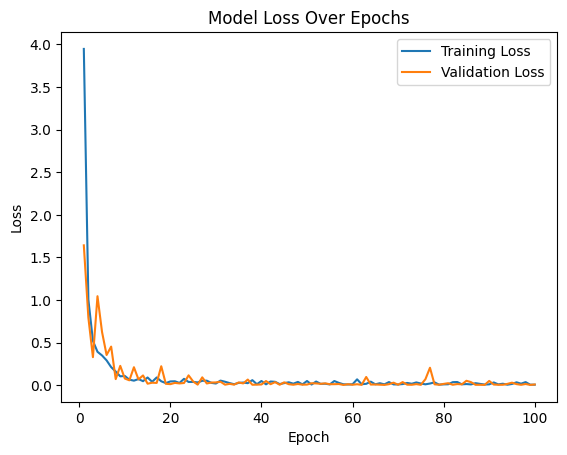

In [59]:
# Extract loss and metrics history
result_df = result.history

# Plot training & validation loss values
plt.plot(range(1, 101), result_df['loss'], label='Training Loss')
plt.plot(range(1, 101), result_df['val_loss'], label='Validation Loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




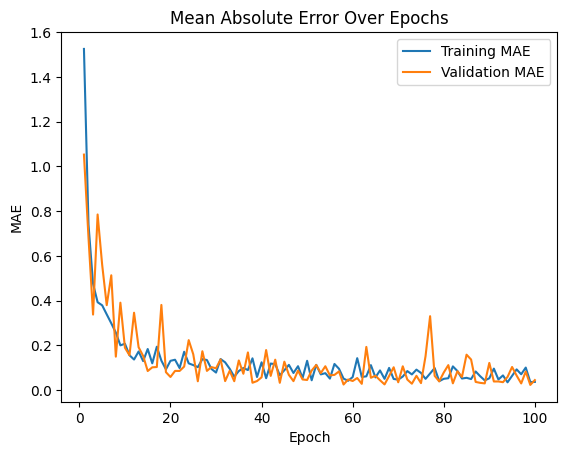

In [60]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 101), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 101), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

class LearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.eval(self.model.optimizer.lr)
        print(f'Epoch {epoch+1}: Learning Rate = {lr}')

# Add the callback to your model training
lr_tracker = LearningRateTracker()

# Train the model with the learning rate tracker
result = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[lr_tracker])


In [ ]:
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(12,activation="softmax")) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])